Case Study 2 [Home Loans Origination Model]:

•	The objective of this exercise is to develop a loan origination model – to help Freddie Mac identify loans which are potentially less risky.

•	This model shall be developed using independent variables from the Originations data. The dependent or target variable shall be created from the Behaviour data.

•	The target variable here shall be created as follows:

o	Accounts which are potentially more risky shall be termed Bad and accounts potentially non-risky shall be termed Good

o	Bad is defined as accounts who have been 2 or more times 2+ cycles delinquent or at least 1 time 3+ cycles delinquent

o	Accounts which have been 1 cycle delinquent (as many times) or just once 2 cycles delinquent shall be termed Indeterminates

o	Accounts which have never missed a payment i.e. their delinquency has never been greater than 0 shall be termed Goods

•	Report the number of Goods, Bads and Indeterminates 

•	Exclude the Intedeterminates and also accounts which have delinquency of 99 in at least one month of their tenure

•	Now, using the Good and Bad accounts, develop a model to predict the probability of Bad. Suitably choose which variables can be used as independent variables from the suite of Origination variables available in the data. 

•	For example, date fields like First Payment Date or Maturity Date should be excluded from the list of independent variables for obvious reasons. Similarly, PIN code should not be used since there are too many different values. Based on such lines, decide which can be good candidates for Independent variables.

•	Once shortlisted, for the different Independent variables, provide a scatter plot with correlation value – for continuous numeric variables.

•	For discrete variables in the independent variable shortlist, provide Bad Rates for each discrete value.

•	The above shall help identify which are potentially predictive independent variables and which are not.

•	Now, using the set of Independent variables and the Good/Bad target variable, develop a GBM model to predict Probability of Bad. Use a 70:30 split for Train and Test.

•	Report the results via Confusion Matrix and also report Precision, Recall, Accuracy and F1-Score – on the test data. 

•	Change the probability threshold of the model (by default it is 0.5) to capture 30% more bads. Re-calculate the confusion matrix (on the test data, of course) and its various metrics based on the new probability threshold. 

•	Discuss which probability threshold is more suited for what objectives and why.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder


Bad is defined as accounts who have been 2 or more times 2+ cycles delinquent or at least 1 time 3+ cycles delinquent
o	Accounts which have been 1 cycle delinquent (as many times) or just once 2 cycles delinquent shall be termed Indeterminates
o	Accounts which have never missed a payment i.e. their delinquency has never been greater than 0 shall be termed Goods
•	Report the number of Goods, Bads and Indeterminates 
•	Exclude the Intedeterminates and also accounts which have delinquency of 99 in at least one month of their tenure


1) Identify the loans with values of delinq 2 for more than twice  
2) Identify the loans with values of delinq 3 for atleast once
3) Identify the loans with values of delinq 1 for atleast once or 2 only once
4) Identify the loans with values of delinq of only zeroes 


In [2]:
df1=pd.read_csv('./Originations_Data.csv')
df1.head()

C:\Users\vinee\AppData\Local\Temp\ipykernel_25900\1337617957.py:1: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('./Originations_Data.csv')


,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only Indicator
0,654,201803,N,204802,NaN,0,1,P,77,35,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1,693,201803,N,203302,24340.0,0,1,P,80,41,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
2,757,201803,Y,204802,NaN,25,1,P,97,10,...,360,1,Other sellers,Other servicers,NaN,NaN,H,NaN,2,N
3,807,201803,N,203302,NaN,0,1,P,26,38,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
4,812,201803,N,203302,19340.0,0,1,P,14,14,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N


In [3]:
df2=pd.read_csv('./Behaviour_Data.csv')
df2.head()

,Loan Sequence Number,Delinquency_Bucket 201802,Delinquency_Bucket 201803,Delinquency_Bucket 201804,Delinquency_Bucket 201805,Delinquency_Bucket 201806,Delinquency_Bucket 201807,Delinquency_Bucket 201808,Delinquency_Bucket 201809,Delinquency_Bucket 201810,...,Delinquency_Bucket 202107,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate
0,F18Q10000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,F18Q10000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,F18Q10000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F18Q10000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,F18Q10000140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's check for the NULLs. As the models can't work on nulls, let's replace them with 0.

In [4]:
df2.isnull().sum()

Loan Sequence Number              0
Delinquency_Bucket 201802    146848
Delinquency_Bucket 201803    143303
Delinquency_Bucket 201804    138296
Delinquency_Bucket 201805    134276
Delinquency_Bucket 201806    130319
Delinquency_Bucket 201807    126165
Delinquency_Bucket 201808    122092
Delinquency_Bucket 201809    117937
Delinquency_Bucket 201810    114101
Delinquency_Bucket 201811    109512
Delinquency_Bucket 201812    105489
Delinquency_Bucket 201901    101971
Delinquency_Bucket 201902     98630
Delinquency_Bucket 201903     94499
Delinquency_Bucket 201904     89526
Delinquency_Bucket 201905     86056
Delinquency_Bucket 201906     82542
Delinquency_Bucket 201907     78916
Delinquency_Bucket 201908     76234
Delinquency_Bucket 201909     73609
Delinquency_Bucket 201910     71139
Delinquency_Bucket 201911     67964
Delinquency_Bucket 201912     65409
Delinquency_Bucket 202001     62757
Delinquency_Bucket 202002     60510
Delinquency_Bucket 202003     58029
Delinquency_Bucket 202004   

In [5]:
df2.fillna(0,inplace=True)
df2.isnull().sum()
#There are no nulls now

Loan Sequence Number         0
Delinquency_Bucket 201802    0
Delinquency_Bucket 201803    0
Delinquency_Bucket 201804    0
Delinquency_Bucket 201805    0
Delinquency_Bucket 201806    0
Delinquency_Bucket 201807    0
Delinquency_Bucket 201808    0
Delinquency_Bucket 201809    0
Delinquency_Bucket 201810    0
Delinquency_Bucket 201811    0
Delinquency_Bucket 201812    0
Delinquency_Bucket 201901    0
Delinquency_Bucket 201902    0
Delinquency_Bucket 201903    0
Delinquency_Bucket 201904    0
Delinquency_Bucket 201905    0
Delinquency_Bucket 201906    0
Delinquency_Bucket 201907    0
Delinquency_Bucket 201908    0
Delinquency_Bucket 201909    0
Delinquency_Bucket 201910    0
Delinquency_Bucket 201911    0
Delinquency_Bucket 201912    0
Delinquency_Bucket 202001    0
Delinquency_Bucket 202002    0
Delinquency_Bucket 202003    0
Delinquency_Bucket 202004    0
Delinquency_Bucket 202005    0
Delinquency_Bucket 202006    0
Delinquency_Bucket 202007    0
Delinquency_Bucket 202008    0
Delinque

Now let's check for the delinquncy and add a target coumns to the df based on the independent variables.
df.columns

In [6]:
delinquency_columns = df2.columns[1:51]
delinquency_columns

Index(['Delinquency_Bucket 201802', 'Delinquency_Bucket 201803',
       'Delinquency_Bucket 201804', 'Delinquency_Bucket 201805',
       'Delinquency_Bucket 201806', 'Delinquency_Bucket 201807',
       'Delinquency_Bucket 201808', 'Delinquency_Bucket 201809',
       'Delinquency_Bucket 201810', 'Delinquency_Bucket 201811',
       'Delinquency_Bucket 201812', 'Delinquency_Bucket 201901',
       'Delinquency_Bucket 201902', 'Delinquency_Bucket 201903',
       'Delinquency_Bucket 201904', 'Delinquency_Bucket 201905',
       'Delinquency_Bucket 201906', 'Delinquency_Bucket 201907',
       'Delinquency_Bucket 201908', 'Delinquency_Bucket 201909',
       'Delinquency_Bucket 201910', 'Delinquency_Bucket 201911',
       'Delinquency_Bucket 201912', 'Delinquency_Bucket 202001',
       'Delinquency_Bucket 202002', 'Delinquency_Bucket 202003',
       'Delinquency_Bucket 202004', 'Delinquency_Bucket 202005',
       'Delinquency_Bucket 202006', 'Delinquency_Bucket 202007',
       'Delinquency_Bucke

In [7]:
delinquency_columns = df2.columns[1:51]

df2['Loan_Category'] = 'Good'
 
for index, row in df2.iterrows():
    delinquency_counts = [row[col] for col in delinquency_columns]


    if (delinquency_counts.count(2)>1) or any(count >= 3 for count in delinquency_counts):
        df2.at[index, 'Loan_Category'] = 'Bad'
 

    elif any(count == 1 for count in delinquency_counts) or (delinquency_counts.count(2)==1):
        df2.at[index, 'Loan_Category'] = 'Indeterminate'

In [8]:
delinquency_columns = df2.columns[1:51]

def get_max_delinq(dataframe):
    dataframe=dataframe.fillna(0)
    
    for index,row in dataframe.iterrows():
        delinquency_counts=[row[col] for col in delinquency_columns]
        maximum=max(delinquency_counts) 
        dataframe.at[index,'Maximum Delinquency']=maximum
    return dataframe
                    
df2=get_max_delinq(df2)
    

In [9]:
df2['Loan_Category'].value_counts()

Loan_Category
Good             136026
Indeterminate      8019
Bad                5952
Name: count, dtype: int64

In [10]:
df_merged=pd.merge(df1,df2[['Loan Sequence Number','Loan_Category','Maximum Delinquency']],on='Loan Sequence Number',how='inner')
df_merged.shape

(141732, 33)

In [11]:
df_merged['Loan_Category'].value_counts()

Loan_Category
Good             128076
Indeterminate      7742
Bad                5914
Name: count, dtype: int64

In [12]:
df_merged['Maximum Delinquency'].value_counts()

Maximum Delinquency
0.0     128076
1.0       6771
2.0       1351
3.0       1000
5.0        583
4.0        549
6.0        476
7.0        333
11.0       316
12.0       273
8.0        269
17.0       224
9.0        208
10.0       190
13.0       169
14.0       168
15.0       135
18.0       130
16.0       121
20.0        91
19.0        71
21.0        66
22.0        54
23.0        31
24.0        26
25.0        14
99.0        13
27.0         8
26.0         4
29.0         3
28.0         3
30.0         2
43.0         1
31.0         1
34.0         1
33.0         1
Name: count, dtype: int64

In [13]:
df_data=df_merged[df_merged['Loan_Category'].isin(['Good','Bad'])]
df_data=df_data[df_data['Maximum Delinquency']!=99]
df_data.shape

(133977, 33)

Once shortlisted, for the different Independent variables, provide a scatter plot with correlation value – for continuous numeric variables.

In [14]:
scatter_data=df_data[['Credit Score','Metropolitan Statistical Area',
       'Mortgage Insurance Percentage', 
       'Original Combined Loan-to-Value', 'Original Debt-to-Income Ratio',
       'Original UPB', 'Original Loan-to-Value', 'Original Interest Rate',
        'Original Loan Term']]

C:\Users\vinee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x5000 with 0 Axes>

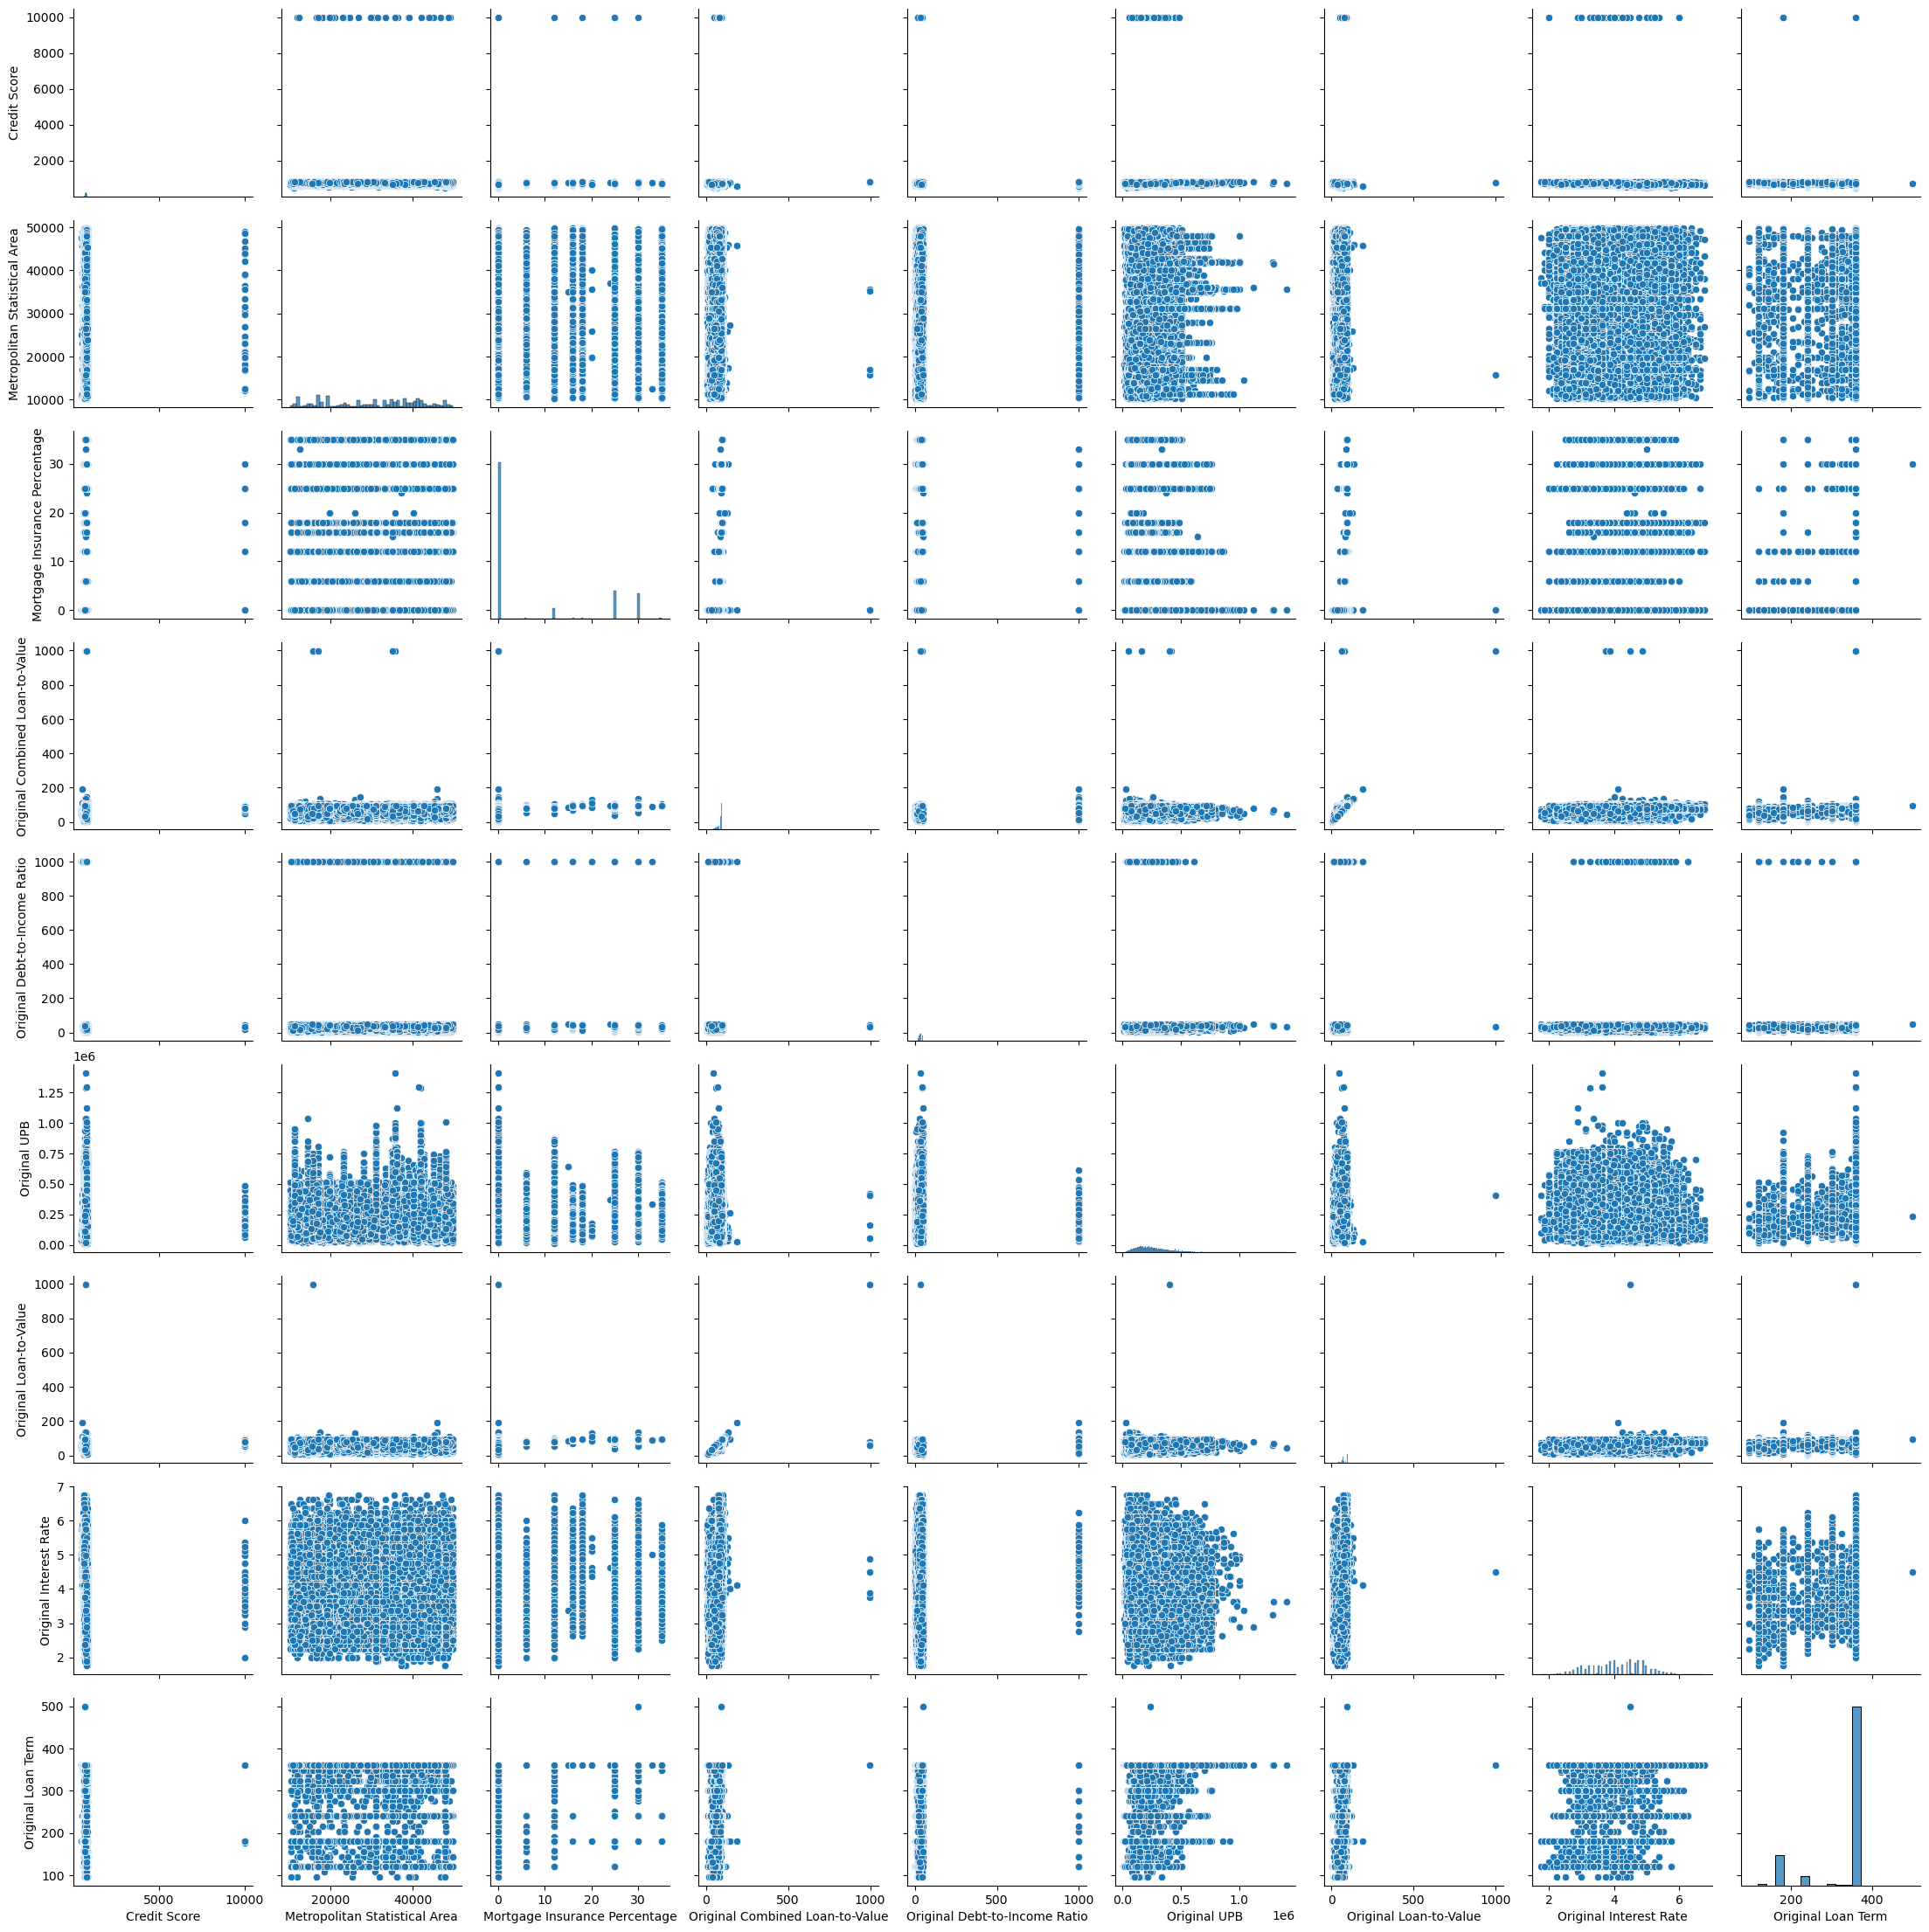

In [15]:
plt.figure(figsize=(50,50))
sb.pairplot(scatter_data)

For discrete variables in the independent variable shortlist, provide Bad Rates for each discrete value.

Discrete Variables List:

First Time Homebuyer Flag
Mortgage Insurance Percentage (MI %)
Number of Units
Occupancy Status
Channel
Prepayment Penalty Mortgage (PPM) Flag
Amortization Type (Formerly Product Type)
Property Type
Loan Purpose
Number of Borrowers
Super Conforming Flag
Program Indicator
HARP Indicator


In [16]:

discrete_data=df_data[['First Time Homebuyer Flag','Mortgage Insurance Percentage','Number of Units','Occupancy Status',\
        'Channel','Prepayment Penalty Mortgage Flag','Amortization Type','Loan_Category',\
        'Property Type','Loan Purpose','Number of Borrowers','Super Conforming Flag','Program Indicator','HARP Indicator']]


In [17]:
grp_disc=discrete_data.groupby('Loan_Category').count().reset_index()
grp_disc_Bad=grp_disc[grp_disc['Loan_Category']=='Bad']

In [18]:
total_count=discrete_data.shape[0]
for col in grp_disc_Bad.columns[1:]:
    
    a=grp_disc_Bad[col].values[0]
    #print(a,total_count)
    print(f'The total count of {col} is {a} and the Bad rate is {round(a/total_count,3)}')
    
    
    

The total count of First Time Homebuyer Flag is 5901 and the Bad rate is 0.044
The total count of Mortgage Insurance Percentage is 5901 and the Bad rate is 0.044
The total count of Number of Units is 5901 and the Bad rate is 0.044
The total count of Occupancy Status is 5901 and the Bad rate is 0.044
The total count of Channel is 5901 and the Bad rate is 0.044
The total count of Prepayment Penalty Mortgage Flag is 5901 and the Bad rate is 0.044
The total count of Amortization Type is 5901 and the Bad rate is 0.044
The total count of Property Type is 5901 and the Bad rate is 0.044
The total count of Loan Purpose is 5901 and the Bad rate is 0.044
The total count of Number of Borrowers is 5901 and the Bad rate is 0.044
The total count of Super Conforming Flag is 267 and the Bad rate is 0.002
The total count of Program Indicator is 5901 and the Bad rate is 0.044
The total count of HARP Indicator is 58 and the Bad rate is 0.0


THE INDEPENDENT VARIABLES ARE:
'Credit Score',

'First Time Homebuyer Flag',

'Metropolitan Statistical Area (MSA) Or Metropolitan Division',

'Mortgage Insurance Percentage (MI %)',

'Number of Units',

'Occupancy Status',

'Original Combined Loan-to-Value (CLTV)',

'Original Debt-to-Income (DTI) Ratio',

'Original UPB',

'Original Loan-to-Value (LTV)',

'Original Interest Rate',

'Channel',

'Prepayment Penalty Mortgage (PPM) Flag',

'Amortization Type (Formerly Product Type)',

'Property Type',

'Loan Purpose',

'Original Loan Term',

'Number of Borrowers',

'Super Conforming Flag',

'Program Indicator',

'HARP Indicator']

In [19]:
final_data=df_data[['Credit Score',
'First Time Homebuyer Flag',
'Metropolitan Statistical Area',
'Mortgage Insurance Percentage',
'Number of Units',
'Occupancy Status',
'Original Combined Loan-to-Value',
'Original Debt-to-Income Ratio',
'Original UPB',
'Original Loan-to-Value',
'Original Interest Rate',
'Channel',
'Prepayment Penalty Mortgage Flag',
'Amortization Type',
'Property Type',
'Loan Purpose',
'Original Loan Term',
'Number of Borrowers',
'Super Conforming Flag',
'Program Indicator',
'HARP Indicator','Loan_Category']]

In [21]:
Numeric_cols=[col for col in final_data.columns if final_data[col].dtype !='object']

Categirical_cols=[col for col in final_data.columns if final_data[col].dtype =='object']
#scale.fit(final_data[Numeric_cols])

In [22]:
Numeric_cols,Categirical_cols

(['Credit Score',
  'Metropolitan Statistical Area',
  'Mortgage Insurance Percentage',
  'Number of Units',
  'Original Combined Loan-to-Value',
  'Original Debt-to-Income Ratio',
  'Original UPB',
  'Original Loan-to-Value',
  'Original Interest Rate',
  'Original Loan Term',
  'Number of Borrowers'],
 ['First Time Homebuyer Flag',
  'Occupancy Status',
  'Channel',
  'Prepayment Penalty Mortgage Flag',
  'Amortization Type',
  'Property Type',
  'Loan Purpose',
  'Super Conforming Flag',
  'Program Indicator',
  'HARP Indicator',
  'Loan_Category'])

In [23]:
final_data=pd.get_dummies(final_data, columns= ['First Time Homebuyer Flag','Occupancy Status','Channel',\
                                                'Prepayment Penalty Mortgage Flag' ,\
                                     'Amortization Type','Property Type','Loan Purpose','Super Conforming Flag',\
                                    'Program Indicator','HARP Indicator','Occupancy Status'])


In [24]:
X=final_data.drop(columns='Loan_Category')
Y=final_data['Loan_Category']

X=X.fillna(0)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
X.isna().sum()

(93783, 37)
(40194, 37)
(93783,)
(40194,)


Credit Score                          0
Metropolitan Statistical Area         0
Mortgage Insurance Percentage         0
Number of Units                       0
Original Combined Loan-to-Value       0
Original Debt-to-Income Ratio         0
Original UPB                          0
Original Loan-to-Value                0
Original Interest Rate                0
Original Loan Term                    0
Number of Borrowers                   0
First Time Homebuyer Flag_N           0
First Time Homebuyer Flag_Y           0
Occupancy Status_I                    0
Occupancy Status_P                    0
Occupancy Status_S                    0
Channel_B                             0
Channel_C                             0
Channel_R                             0
Prepayment Penalty Mortgage Flag_N    0
Amortization Type_FRM                 0
Property Type_CO                      0
Property Type_CP                      0
Property Type_MH                      0
Property Type_PU                      0


In [26]:
model=GradientBoostingClassifier()

In [27]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [28]:
prediction=pd.DataFrame(model.predict(x_test))

In [29]:
prediction.value_counts()

Good    40193
Bad         1
Name: count, dtype: int64

In [30]:
Y.value_counts()

Loan_Category
Good    128076
Bad       5901
Name: count, dtype: int64

In [31]:
model.score(x_test,y_test)

0.9542717818579888

In [32]:
12/40182*100

0.029864118261908316

In [33]:
f=model.feature_names_in_
i=model.feature_importances_
f_i=pd.DataFrame(i,f)

In [34]:
f_i.sort_values

<bound method DataFrame.sort_values of                                            0
Credit Score                        0.462303
Metropolitan Statistical Area       0.035656
Mortgage Insurance Percentage       0.002063
Number of Units                     0.010138
Original Combined Loan-to-Value     0.056274
Original Debt-to-Income Ratio       0.127764
Original UPB                        0.041432
Original Loan-to-Value              0.023073
Original Interest Rate              0.151727
Original Loan Term                  0.002692
Number of Borrowers                 0.054913
First Time Homebuyer Flag_N         0.001592
First Time Homebuyer Flag_Y         0.003576
Occupancy Status_I                  0.000701
Occupancy Status_P                  0.000189
Occupancy Status_S                  0.000000
Channel_B                           0.000000
Channel_C                           0.005533
Channel_R                           0.007880
Prepayment Penalty Mortgage Flag_N  0.000000
Amortization Typ

In [39]:
df1['Credit Score'].max()-df1['Credit Score'].min()

9520

In [36]:
from sklearn.preprocessing import StandardScaler
final_data.shape

(133977, 38)

In [37]:
scale=StandardScaler()


In [38]:
scale.fit(X)

StandardScaler()

In [40]:
X_new=scale.transform(X)

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
X.isna().sum()

(93783, 37)
(40194, 37)
(93783,)
(40194,)


Credit Score                          0
Metropolitan Statistical Area         0
Mortgage Insurance Percentage         0
Number of Units                       0
Original Combined Loan-to-Value       0
Original Debt-to-Income Ratio         0
Original UPB                          0
Original Loan-to-Value                0
Original Interest Rate                0
Original Loan Term                    0
Number of Borrowers                   0
First Time Homebuyer Flag_N           0
First Time Homebuyer Flag_Y           0
Occupancy Status_I                    0
Occupancy Status_P                    0
Occupancy Status_S                    0
Channel_B                             0
Channel_C                             0
Channel_R                             0
Prepayment Penalty Mortgage Flag_N    0
Amortization Type_FRM                 0
Property Type_CO                      0
Property Type_CP                      0
Property Type_MH                      0
Property Type_PU                      0


In [42]:
X_new=pd.DataFrame(X_new,columns=X.columns)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(93783, 37)
(40194, 37)
(93783,)
(40194,)


In [44]:
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [45]:
p2=model.predict(x_test)

In [46]:
pd.DataFrame(p2).value_counts()

Good    40180
Bad        14
Name: count, dtype: int64

In [47]:
from sklearn import metrics

In [48]:
print('accuracy_score',metrics.accuracy_score(y_test,p2,))
print('recall_score',metrics.recall_score(y_test,p2,average='weighted'))
print('f1_score',metrics.f1_score(y_test,p2,average='weighted'))
print('precision_score',metrics.precision_score(y_test,p2,average='weighted'))

accuracy_score 0.9568841120565259
recall_score 0.9568841120565259
f1_score 0.9361421071679501
precision_score 0.9222606155318431
